# APS1070 Week 5 Lecture Code
## Part 1 - Linear Algebra




##Inverting a Matrix

In [16]:
import numpy as np
from numpy.linalg import inv

In [17]:
mat = np.array([[1,0,2,0],[1,1,0,0], [1,2,0,1],[1,1,0,1]])
mat

array([[1, 0, 2, 0],
       [1, 1, 0, 0],
       [1, 2, 0, 1],
       [1, 1, 0, 1]])

In [18]:
mat_inv = inv(mat)
mat_inv

array([[ 0. ,  1. , -1. ,  1. ],
       [ 0. ,  0. ,  1. , -1. ],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0. , -1. ,  0. ,  1. ]])

In [19]:
mat_inv@mat

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [20]:
mat@mat_inv

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Part 2 - Analytical Geometry

NORM

In [22]:
from numpy import linalg as LA
a = np.array([3,4])
a

array([3, 4])

In [23]:
LA.norm(a)

5.0

DOT PRODUCT

In [24]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x,y)

[1 2 3] [4 5 6]


In [25]:
product = x.T * y
product.sum()

32

In [26]:
np.dot(x,y)

32

Lengths and distances

In [28]:
x = np.array([1,0,1])
y = np.array([0,1,1])
print(x,y)

[1 0 1] [0 1 1]


In [29]:
np.linalg.norm(x-y)

1.4142135623730951

Angles and orthogonality

In [30]:
x = np.array([1,1])
y = np.array([1,2])
print(x,y)

[1 1] [1 2]


In [31]:
np.degrees(np.arccos(np.dot(x,y)/(np.dot(x,x)*np.dot(y,y))**0.5))

18.434948822922017

## Part 3 - Data Augmentation
Many of the transformation techniques covered in lecture can be implemented on on image data to improve the performance of our machine learning algorithms. Provided is a demonstration of some of the common transformations used for data augmentation. 

Load Sample Image

In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import transform
from skimage.transform import rotate, AffineTransform, resize
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage


In [20]:
# load image to Google Colab
from google.colab import files
uploaded = files.upload()

Saving image.jpg to image (1).jpg


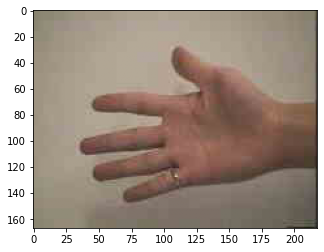

In [21]:
# load Image
img = imread('./image.jpg') / 255

# plot original Image
plt.imshow(img)
plt.show()

Rotations

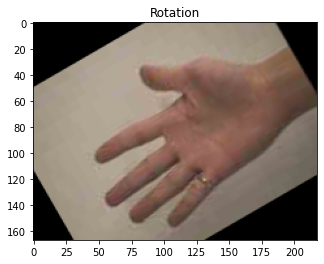

In [22]:
# image rotation using skimage.transformation.rotate
image_rot = rotate(img, angle=30)

plt.title('Rotation')
plt.imshow(image_rot)
plt.show()



Shear

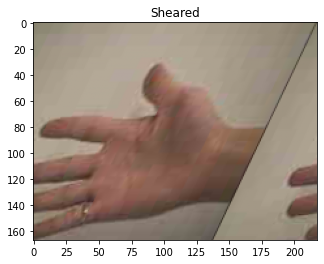

In [23]:
# image shearing using sklearn.transform.AffineTransform
tf = AffineTransform(shear=-0.5)

sheared = transform.warp(img, tf, order=1, preserve_range=True, mode='wrap')
plt.title('Sheared')
plt.imshow(sheared)
plt.show()

Scaling

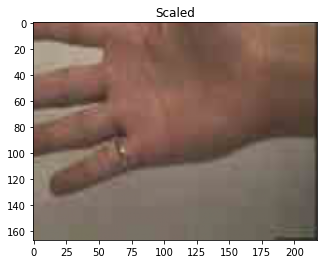

Original Shape:  (167, 218, 3)
Rescaled Shape:  (167, 218, 3)


In [24]:
# Image rescaling with sklearn.transform.resize
rows = img.shape[0]
cols = img.shape[1]
scaled = resize(img[70:170,60:260,:], (rows, cols))

plt.title('Scaled')
plt.imshow(scaled)
plt.show()

print('Original Shape: ',img.shape)
print('Rescaled Shape: ',scaled.shape)


Flipping or Reflection

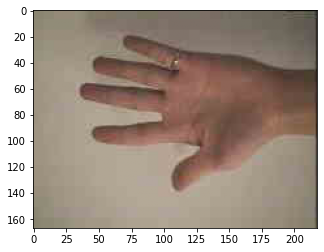

In [25]:
# flip up-down using np.flipud
up_down = np.flipud(img)

plt.imshow(up_down)
plt.show()

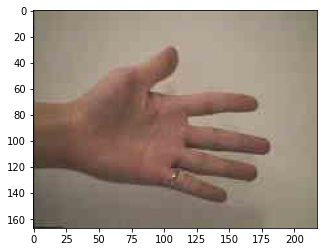

In [26]:
# flip left-right using np.fliplr
left_right = np.fliplr(img)

plt.imshow(left_right)
plt.show()

Add Noise

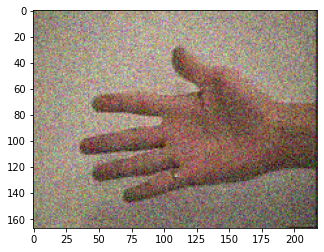

In [27]:
# Apply Random Noise to image using skimage.utils.random_noise
noised = random_noise(img, var=0.1**2)

plt.imshow(noised)
plt.show()

Increase Brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


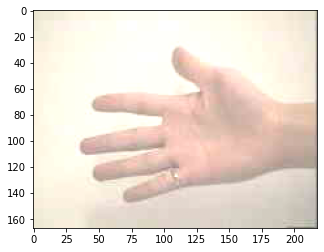

In [28]:
# Increasing the brighness of the Image
# Note: Here we add 100/255 since we scaled Intensity values of Image when loading (by dividing it 255)

highB = img + (100/255)

plt.imshow(highB)
plt.show()

Increase Contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


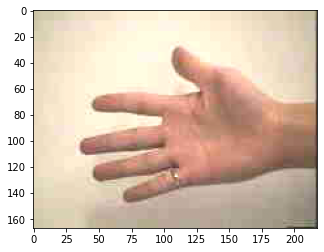

In [29]:
# Increasing the contrast of the Image
highC = img * 1.5

plt.imshow(highC)
plt.show()

From a single image we were able to generate many different images which we could use to augment our training data.